<a href="https://colab.research.google.com/github/TejasSawant21/DBMS-Project/blob/main/DBMS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
pip install matplotlib numpy pandas seaborn  mysql-connector-python

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 34.0/34.0 MB 32.3 MB/s eta 0:00:00


In [54]:
import mysql.connector
import pandas as pd


In [ ]:
# Connect to MySQL
connection = mysql.connector.connect(
    host="127.0.0.1",       # Replace with your host (e.g., "127.0.0.1")
    user="root",   # Your MySQL username
    password="Tejas@21", # Your MySQL password
    database="newschema" # Optional: specify database to connect to
)


In [ ]:
# Check connection
if connection.is_connected():
    print("Connected to MySQL!")

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
'''Connected to MySQL!

In [ ]:
#create cursor object to execute sql queries
cursor = connection.cursor()

In [62]:
from google.colab import files
uploaded = files.upload()  # This will prompt file upload


Saving placementdata.csv to placementdata (5).csv


In [63]:
print(uploaded.keys())


dict_keys(['placementdata (5).csv'])


In [64]:
import pandas as pd
import io

filename = list(uploaded.keys())[0]  # Get the uploaded filename dynamically
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# Verify the data
df.head()


StudentID  CGPA  Internships  Projects  Workshops/Certifications  \
0          1   7.5            1         1                         1   
1          2   8.9            0         3                         2   
2          3   7.3            1         2                         2   
3          4   7.5            1         1                         2   
4          5   8.3            1         2                         2   

   AptitudeTestScore  SoftSkillsRating ExtracurricularActivities  \
0                 65               4.4                        No   
1                 90               4.0                       Yes   
2                 82               4.8                       Yes   
3                 85               4.4                       Yes   
4                 86               4.5                       Yes   

  PlacementTraining  SSC_Marks  HSC_Marks PlacementStatus  
0                No         61         79       NotPlaced  
1               Yes         78         82          Placed  
2                No         79         80       NotPlaced  
3               Yes         81         80          Placed  
4               Yes         74         88          Placed

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns


In [66]:
# Set plot style
sns.set_style("whitegrid")

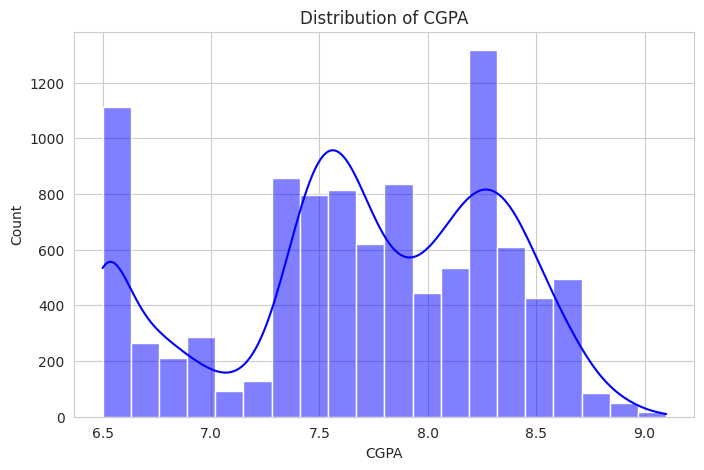

In [67]:
# 1. Histogram of CGPA
plt.figure(figsize=(8,5))
sns.histplot(df['CGPA'], bins=20, kde=True, color='blue')
plt.title("Distribution of CGPA")
plt.show()

<ipython-input-68-9d28441128eb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PlacementStatus', y='CGPA', data=df, palette="coolwarm")


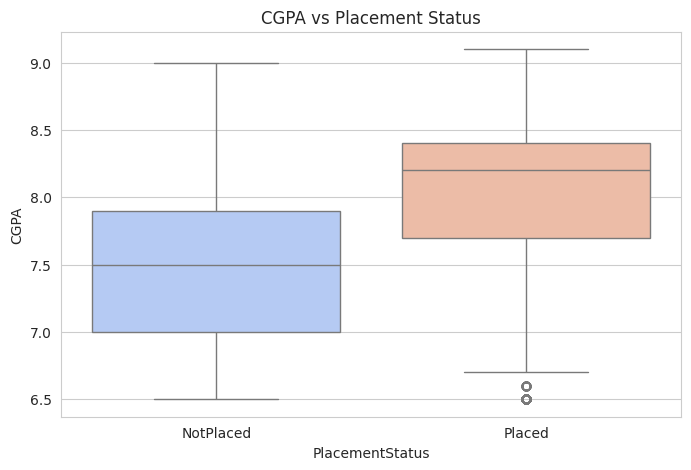

In [68]:
# 2. Boxplot of CGPA vs Placement Status
plt.figure(figsize=(8,5))
sns.boxplot(x='PlacementStatus', y='CGPA', data=df, palette="coolwarm")
plt.title("CGPA vs Placement Status")
plt.show()

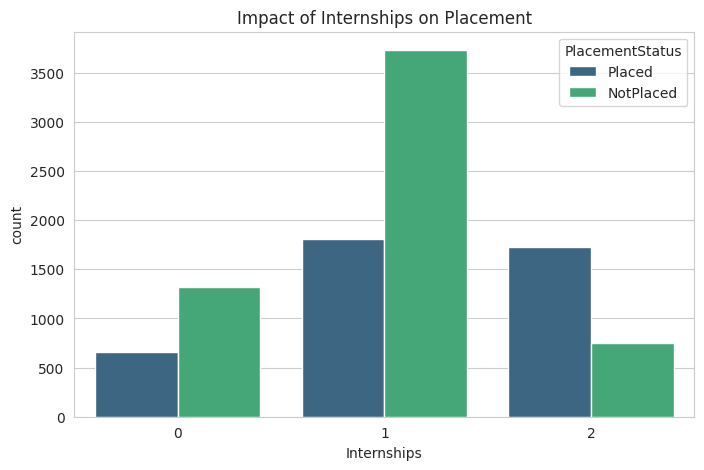

In [69]:
# 3. Internships vs Placement (Bar Chart)
plt.figure(figsize=(8,5))
sns.countplot(x='Internships', hue='PlacementStatus', data=df, palette="viridis")
plt.title("Impact of Internships on Placement")
plt.show()

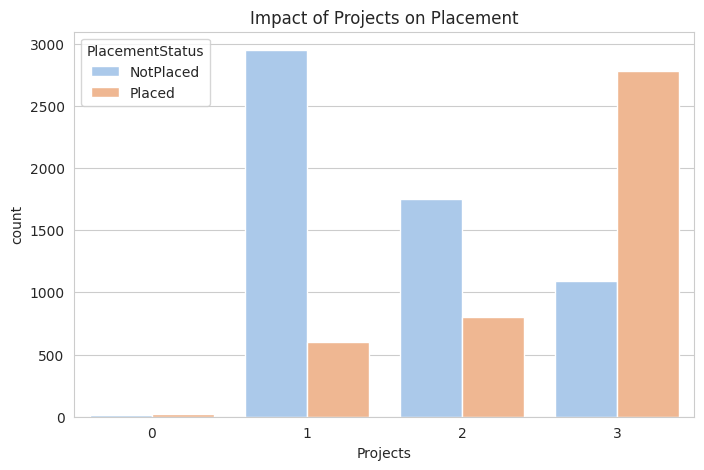

In [70]:
# 4. Projects vs Placement (Bar Chart)
plt.figure(figsize=(8,5))
sns.countplot(x='Projects', hue='PlacementStatus', data=df, palette="pastel")
plt.title("Impact of Projects on Placement")
plt.show()

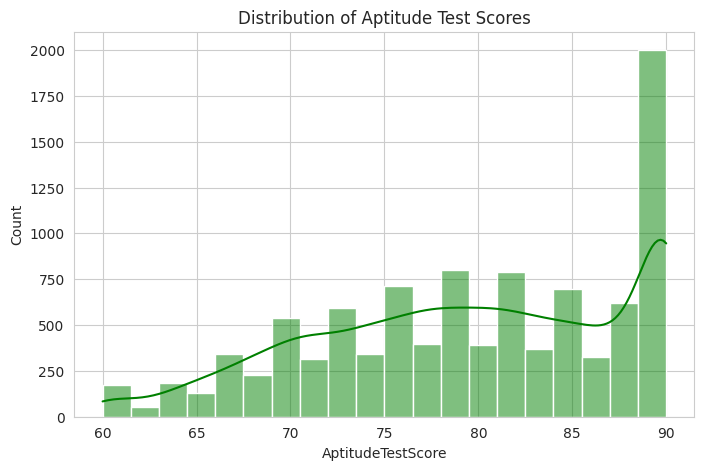

In [71]:
# 5. Histogram of Aptitude Test Scores
plt.figure(figsize=(8,5))
sns.histplot(df['AptitudeTestScore'], bins=20, kde=True, color='green')
plt.title("Distribution of Aptitude Test Scores")
plt.show()

<ipython-input-72-0b3718f32afe>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PlacementStatus', y='SoftSkillsRating', data=df, palette="muted")


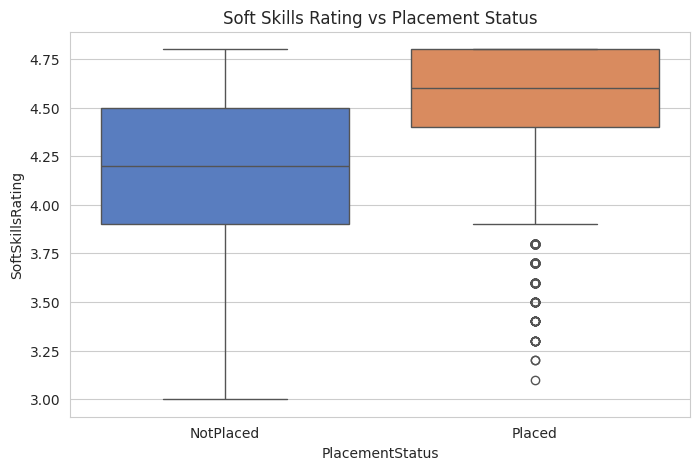

In [72]:
# 6. Boxplot of Soft Skills Rating vs Placement Status
plt.figure(figsize=(8,5))
sns.boxplot(x='PlacementStatus', y='SoftSkillsRating', data=df, palette="muted")
plt.title("Soft Skills Rating vs Placement Status")
plt.show()

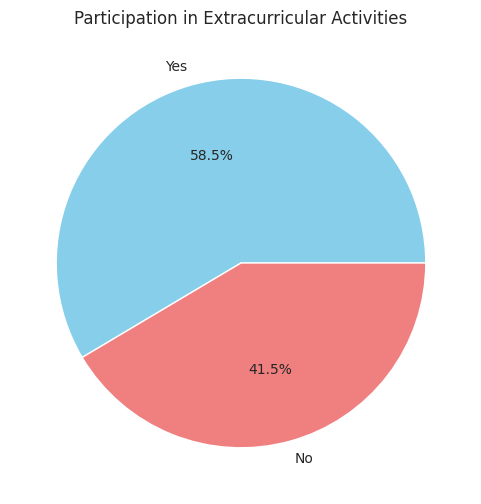

In [73]:
# 7. Pie Chart of Extracurricular Activities
plt.figure(figsize=(6,6))
df['ExtracurricularActivities'].value_counts().plot.pie(autopct='%1.1f%%', colors=["skyblue", "lightcoral"])
plt.title("Participation in Extracurricular Activities")
plt.ylabel('')
plt.show()

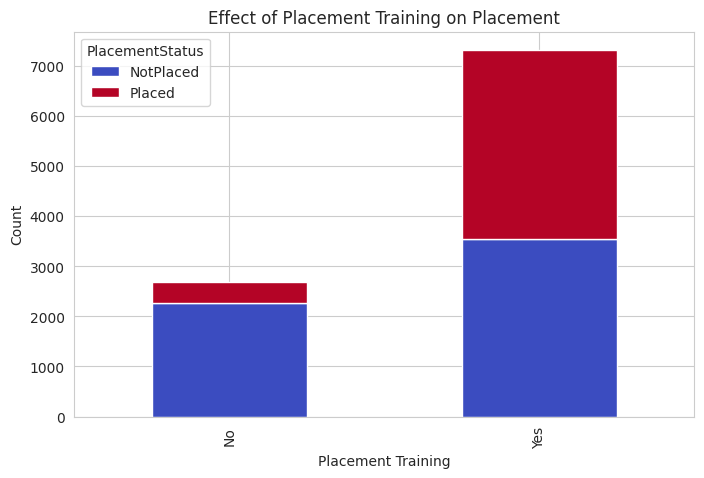

In [74]:
# 8. Placement Training vs Placement (Stacked Bar Chart)
crosstab = pd.crosstab(df['PlacementTraining'], df['PlacementStatus'])
crosstab.plot(kind='bar', stacked=True, figsize=(8,5), colormap='coolwarm')
plt.title("Effect of Placement Training on Placement")
plt.xlabel("Placement Training")
plt.ylabel("Count")
plt.show()

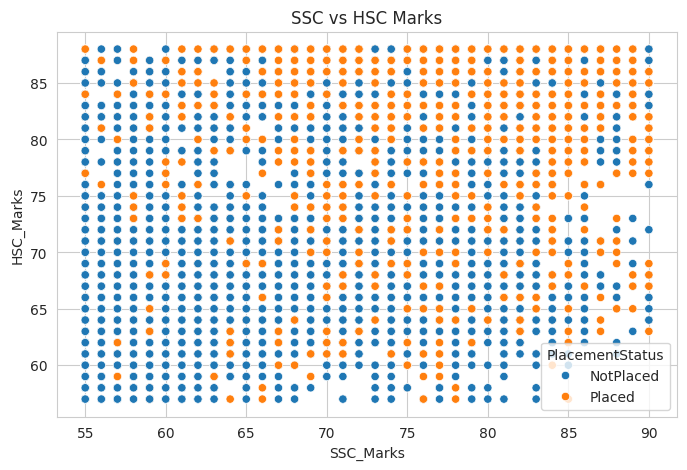

In [75]:
# 9. Scatter plot of SSC vs HSC Marks
plt.figure(figsize=(8,5))
sns.scatterplot(x='SSC_Marks', y='HSC_Marks', hue='PlacementStatus', data=df)
plt.title("SSC vs HSC Marks")
plt.show()

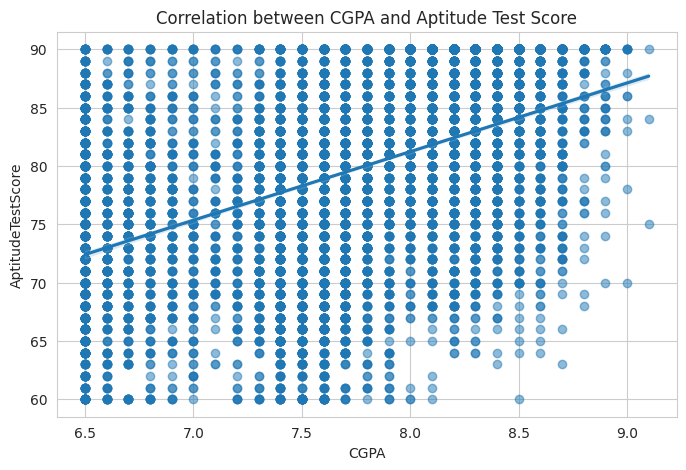

In [76]:
# 10. Scatter plot with regression line (CGPA vs Aptitude Score)
plt.figure(figsize=(8,5))
sns.regplot(x='CGPA', y='AptitudeTestScore', data=df, scatter_kws={'alpha':0.5})
plt.title("Correlation between CGPA and Aptitude Test Score")
plt.show()

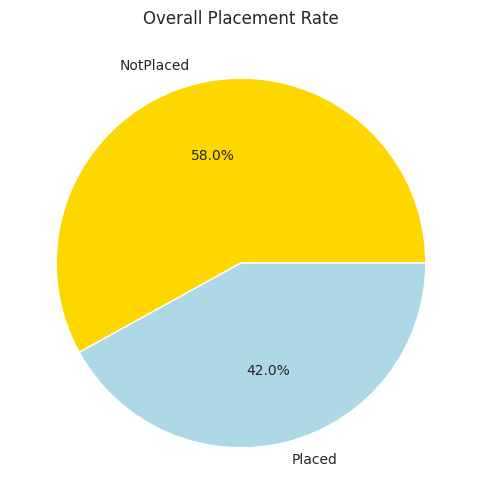

In [77]:
# 11. Placement Rate Pie Chart
plt.figure(figsize=(6,6))
df['PlacementStatus'].value_counts().plot.pie(autopct='%1.1f%%', colors=["gold", "lightblue"])
plt.title("Overall Placement Rate")
plt.ylabel('')
plt.show()


üìä Conclusion

This DBMS and Data Visualization project provided valuable insights into structured data management and analytics.

Key insights include:

Structured storage and retrieval of data using SQL databases.

Data visualization techniques enhance understanding of database trends.

The integration of Python with DBMS makes data analysis more efficient and insightful.

This project highlights the importance of DBMS in data-driven decision-making, offering valuable techniques for students and professionals alike.

